# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Lab 1 - Regression

#### @Original content author: Amin Kabir - kabir@sfu.ca


In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python

In [2]:
# load data from Q1
%store -r df F T F_train F_test T_train T_test

           TEY        CO
AT   -0.091152 -0.174326
AP    0.118224  0.067050
AH   -0.137360  0.106586
AFDP  0.665483 -0.448425
GTEP  0.964127 -0.518909
TIT   0.910297 -0.706275
TAT  -0.682396  0.058353
CDP   0.988778 -0.551027


Text(33.0, 0.5, 'Features')

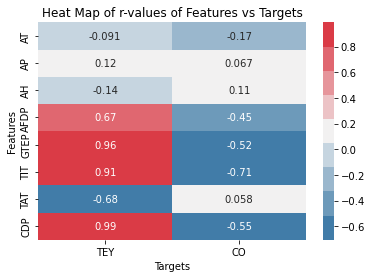

In [7]:
# Heat map for r-values of features vs targets
r = df.corr().iloc[:8, 8:10]
print(r)

# plt.figure(figsize=(25,10))
sns.heatmap(r,annot=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.title('Heat Map of r-values of Features vs Targets')
plt.xlabel('Targets')
plt.ylabel('Features')

In [14]:
print(F_train)

            AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP
20283  25.6180  1011.8  83.660  5.1749  25.785  1091.8  549.84  12.196
16135   8.1445  1016.8  82.759  3.0298  23.676  1084.4  549.99  11.758
31653  19.8900  1014.7  50.870  3.4682  27.691  1085.9  549.65  12.272
24788  21.7360  1004.8  61.101  4.6942  32.077  1100.0  539.13  13.546
35515  12.6360  1026.7  67.414  2.6479  18.974  1048.4  549.53  10.325
...        ...     ...     ...     ...     ...     ...     ...     ...
20757  21.4400  1016.4  69.872  4.0975  31.548  1100.0  535.98  13.466
32103  19.7770  1010.2  48.017  3.7177  26.939  1092.7  549.99  12.512
30403  13.8980  1014.5  58.938  4.0997  34.999  1099.9  539.86  13.573
21243  17.0020  1020.9  89.051  4.1599  32.377  1100.0  532.23  13.743
2732   18.9340  1014.5  82.974  4.5034  31.518  1100.3  533.56  13.754

[29386 rows x 8 columns]


In [39]:
## Model building
from sklearn.linear_model import LinearRegression

# TEY - top four features: CDP, TIT, GTEP, (AFTP or TAT)? 
mlr_TEY = LinearRegression().fit(F_train[['TIT', 'CDP', 'GTEP', 'AFDP']], T_train['TEY'])

#CO - top four features 
mlr_CO = LinearRegression().fit(F_train[['TIT', 'CDP', 'GTEP', 'AFDP']], T_train['CO'])

In [40]:
## Model evalutation
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error as MSE

r2, RMSE, yp = [], [], []



for n in range(2):
    if n == 0:
        mlr = mlr_TEY
        target = 'TEY'
    else:
        mlr = mlr_CO
        target = 'CO'
    
    yp.append(mlr.predict(F_test[['TIT', 'CDP', 'GTEP', 'AFDP']]).astype('int64'))
    r2.append(r2_score(T_test[target], yp[n]))
    RMSE.append([('%s' %target), sqrt(MSE(T_test[target], yp[n]))])
    
    print('\nMLR Model (%s): r-squared = %f, RMSE = %f' %(target, r2[n], RMSE[n][1]))


MLR Model (TEY): r-squared = 0.980090, RMSE = 2.227878

MLR Model (CO): r-squared = 0.484101, RMSE = 1.622044


<BarContainer object of 2 artists>

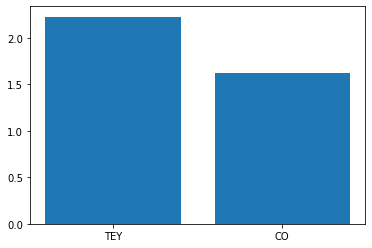

In [43]:
## Barchart of RMSE Values

RMSE_df = pd.DataFrame (RMSE, columns = ['Feature', 'RMSE'])  
plt.bar(RMSE_df.iloc[:,0],RMSE_df.iloc[:,1])